<a href="https://colab.research.google.com/github/pursh2002/-100-day-challange/blob/master/Predicting_Type_of_Wine_%26_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
cd

/root


#### Loading The Data

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
!pip install -q matplotlib-venn

In [0]:
#!apt-get -qq install -y libfluidsynth1

Selecting previously unselected package libfluidsynth1:amd64.
(Reading database ... 131188 files and directories currently installed.)
Preparing to unpack .../libfluidsynth1_1.1.9-1_amd64.deb ...
Unpacking libfluidsynth1:amd64 (1.1.9-1) ...
Processing triggers for libc-bin (2.27-3ubuntu1) ...
Setting up libfluidsynth1:amd64 (1.1.9-1) ...
Processing triggers for libc-bin (2.27-3ubuntu1) ...


In [0]:
# To determine which version you're using:
#!pip show tensorflow

# For the current version: 
#!pip install --upgrade tensorflow

# For a specific version:
#!pip install tensorflow==1.2

# For the latest nightly build:
#!pip install tf-nightly

In [0]:
#!apt-get -qq install -y libarchive-dev && pip install -q -U libarchive
#import libarchive

(Reading database ... 131193 files and directories currently installed.)
Preparing to unpack .../libarchive13_3.2.2-3.1ubuntu0.4_amd64.deb ...
Unpacking libarchive13:amd64 (3.2.2-3.1ubuntu0.4) over (3.2.2-3.1ubuntu0.3) ...
Selecting previously unselected package libarchive-dev:amd64.
Preparing to unpack .../libarchive-dev_3.2.2-3.1ubuntu0.4_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.2.2-3.1ubuntu0.4) ...
Setting up libarchive13:amd64 (3.2.2-3.1ubuntu0.4) ...
Processing triggers for libc-bin (2.27-3ubuntu1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Setting up libarchive-dev:amd64 (3.2.2-3.1ubuntu0.4) ...
     |████████████████████████████████| 163kB 6.6MB/s 


In [0]:
!apt-get -qq install -y graphviz && pip install -q pydot
import pydot

In [4]:
!mkdir -p drive
!google-drive-ocamlfuse drive

/bin/bash: google-drive-ocamlfuse: command not found


In [0]:
#!apt-get -qq install python-cartopy python3-cartopy
#import cartopy

In [5]:
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python
import cv2

     |████████████████████████████████| 28.7MB 1.3MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


In [6]:
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
cd

### Load Data 

In [0]:
ls

In [11]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

--2019-10-01 17:41:37--  http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 264426 (258K) [application/x-httpd-php]
Saving to: ‘winequality-white.csv’

winequality-white.c 100%[===================>] 258.23K   622KB/s    in 0.4s    

2019-10-01 17:41:38 (622 KB/s) - ‘winequality-white.csv’ saved [264426/264426]



In [12]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

--2019-10-01 17:42:01--  http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84199 (82K) [application/x-httpd-php]
Saving to: ‘winequality-red.csv’

winequality-red.csv 100%[===================>]  82.23K   401KB/s    in 0.2s    

2019-10-01 17:42:01 (401 KB/s) - ‘winequality-red.csv’ saved [84199/84199]



In [13]:
ls

winequality-red.csv  winequality-white.csv


In [16]:
pwd

'/root'

In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

In [0]:
#from google.colab import drive
#drive.mount('/content/drive')

## EXPLORE THE  DATA

In [22]:
PATH_red = "/root/winequality-red.csv"
PATH_white = "/root/winequality-white.csv"
red = pd.read_csv(PATH_red, sep=';')
white = pd.read_csv(PATH_white, sep=';')
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [23]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


#### DATA EXPLORATION

In [24]:
red.shape

(1599, 12)

In [26]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [25]:
white.shape

(4898, 12)

In [27]:
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [30]:
red.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [28]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### missing value

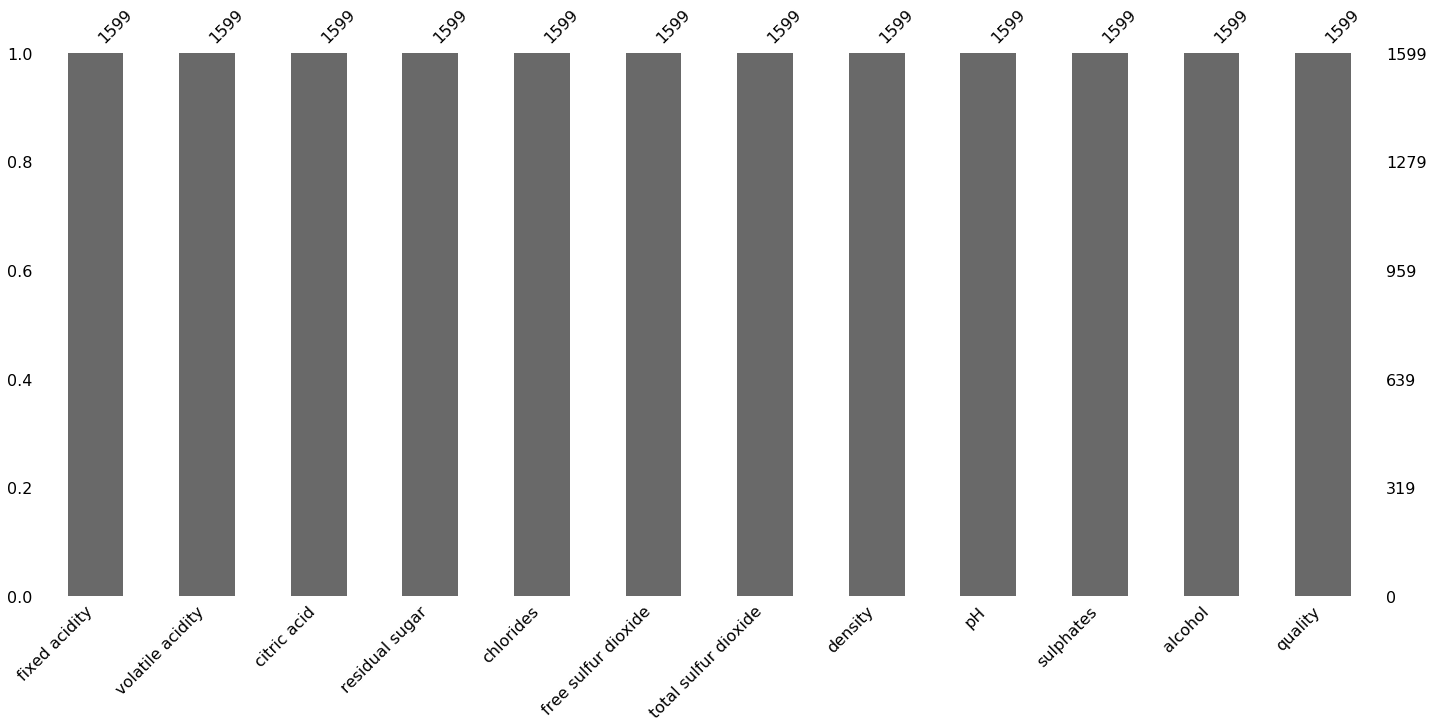

In [32]:
msno.bar(red)

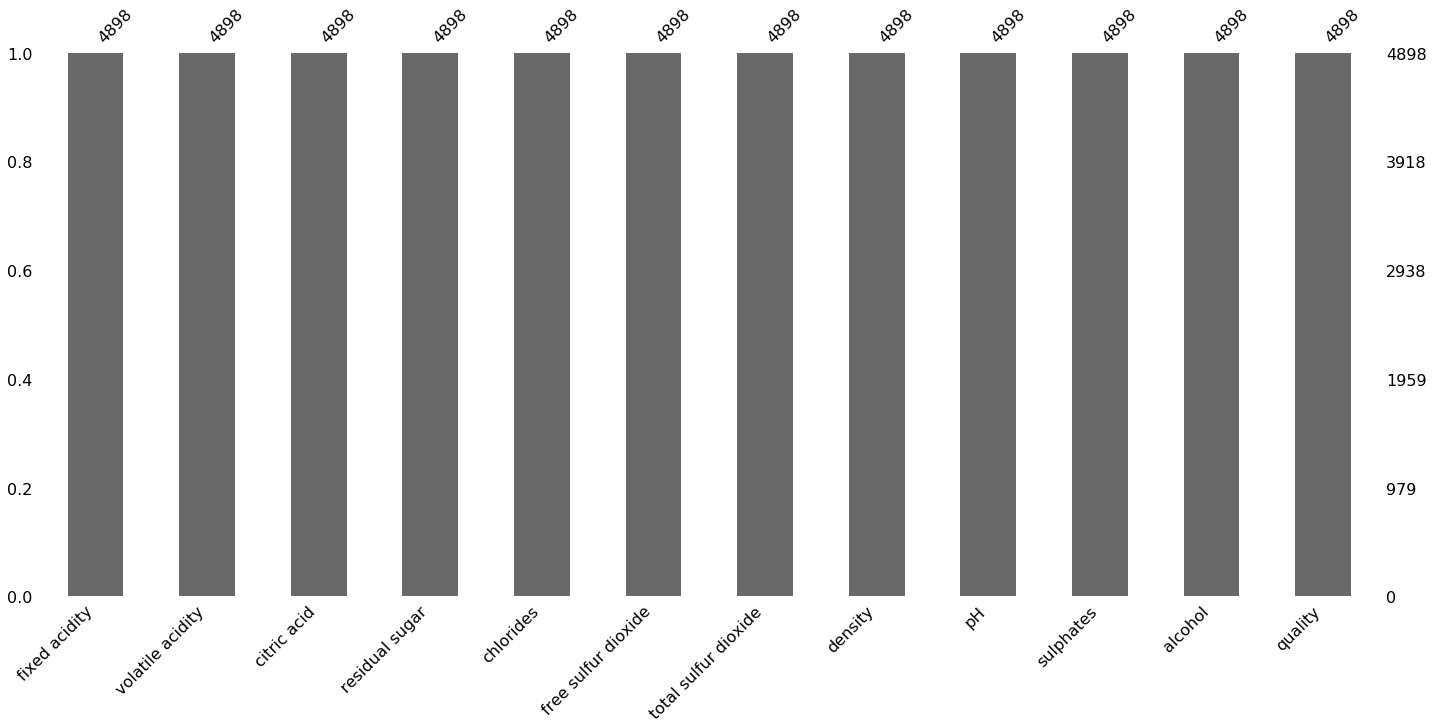

In [33]:
msno.bar(white)

In [34]:
red.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [35]:
white.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### Visualizing The Data

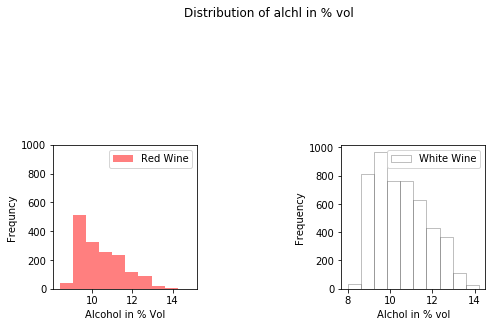

In [44]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(1,2)
ax[0].hist(red.alcohol,10,facecolor='red',alpha=0.5,label='Red Wine')
ax[1].hist(white.alcohol,10,facecolor='white',ec='black',lw=0.5,alpha = 0.5,label = 'White Wine')
fig.subplots_adjust(left=0,right=1,bottom=0,top=0.5,hspace=0.05,wspace=1)
ax[0].set_ylim([0,1000])
ax[0].set_xlabel("Alcohol in % Vol")
ax[0].set_ylabel("Frequncy")
ax[1].set_xlabel("Alchol in % vol")
ax[1].set_ylabel("Frequency")
ax[0].legend(loc='best')
ax[1].legend(loc='best')
fig.suptitle("Distribution of alchl in % vol")

plt.show()

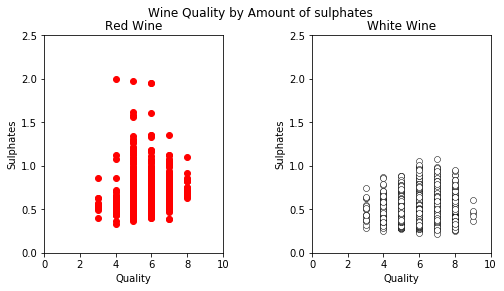

In [49]:
fig , ax = plt.subplots(1,2,figsize=(8,4))
ax[0].scatter(red['quality'],red["sulphates"],color='red')
ax[1].scatter(white['quality'],white['sulphates'],color="white",edgecolors="black",lw=0.5)
ax[0].set_title("Red Wine")
ax[1].set_title("White Wine")
ax[0].set_xlabel("Quality")
ax[1].set_xlabel("Quality")
ax[0].set_ylabel("Sulphates")
ax[1].set_ylabel("Sulphates")
ax[0].set_xlim([0,10])
ax[1].set_xlim([0,10])
ax[0].set_ylim([0,2.5])
ax[1].set_ylim([0,2.5])
fig.subplots_adjust(wspace=0.5)
fig.suptitle("Wine Quality by Amount of sulphates")
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

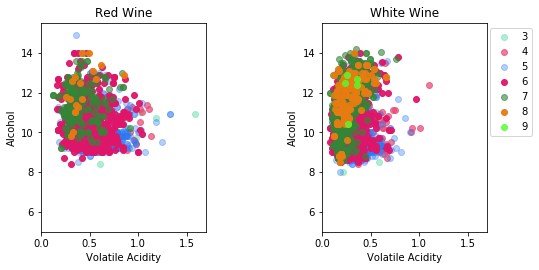

In [57]:

np.random.seed(570)

redlabels = np.unique(red['quality'])
whitelabels = np.unique(white['quality'])

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
redcolors = np.random.rand(6,4)
whitecolors = np.append(redcolors, np.random.rand(1,4), axis=0)

for i in range(len(redcolors)):
    redy = red['alcohol'][red.quality == redlabels[i]]
    redx = red['volatile acidity'][red.quality == redlabels[i]]
    ax[0].scatter(redx, redy, c=redcolors[i])
for i in range(len(whitecolors)):
    whitey = white['alcohol'][white.quality == whitelabels[i]]
    whitex = white['volatile acidity'][white.quality == whitelabels[i]]
    ax[1].scatter(whitex, whitey, c=whitecolors[i])
    
ax[0].set_title("Red Wine")
ax[1].set_title("White Wine")
ax[0].set_xlim([0,1.7])
ax[1].set_xlim([0,1.7])
ax[0].set_ylim([5,15.5])
ax[1].set_ylim([5,15.5])
ax[0].set_xlabel("Volatile Acidity")
ax[0].set_ylabel("Alcohol")
ax[1].set_xlabel("Volatile Acidity")
ax[1].set_ylabel("Alcohol") 
#ax[0].legend(redlabels, loc='best', bbox_to_anchor=(1.3, 1))
ax[1].legend(whitelabels, loc='best', bbox_to_anchor=(1.3, 1))
#fig.suptitle("Alcohol - Volatile Acidity")
fig.subplots_adjust(top=0.85, wspace=0.7)

plt.show()

#### Preprocess Data

In [0]:
red['type']= 1
white['type'] = 0
wines = red.append(white,ignore_index=True)

In [62]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [67]:
import pandas_profiling 

pandas_profiling.ProfileReport(wines)

Number of variables,13
Number of observations,6497
Total Missing (%),0.0%
Total size in memory,659.9 KiB
Average record size in memory,104.0 B
Numeric,12
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,0


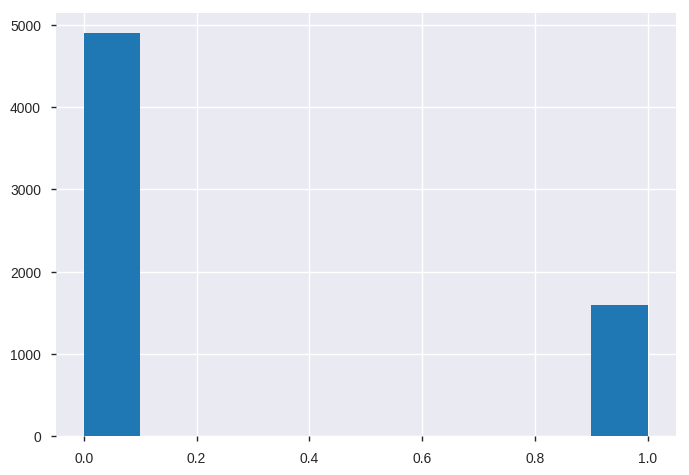

In [68]:
wines['type'].hist()

### Train and Test Sets

In [0]:
from sklearn.model_selection import train_test_split
#dataset = loadtxt(wines, delimiter=',')
X = wines.iloc[:, 0:11].values
y =wines.iloc[:,12].values
# y=np.ravel(wines.type)

In [110]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [111]:
X

array([[ 7.4 ,  0.7 ,  0.  , ...,  3.51,  0.56,  9.4 ],
       [ 7.8 ,  0.88,  0.  , ...,  3.2 ,  0.68,  9.8 ],
       [ 7.8 ,  0.76,  0.04, ...,  3.26,  0.65,  9.8 ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  2.99,  0.46,  9.4 ],
       [ 5.5 ,  0.29,  0.3 , ...,  3.34,  0.38, 12.8 ],
       [ 6.  ,  0.21,  0.38, ...,  3.26,  0.32, 11.8 ]])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=45)

In [0]:
from sklearn.preprocessing import StandardScaler
# Define the scaler 
scaler = StandardScaler().fit(X_train)
# Scale the train set
X_train = scaler.transform(X_train)
# Scale the test set
X_test = scaler.transform(X_test)

In [0]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential
# Import `Dense` from `keras.layers`
from keras.layers import Dense
# Initialize the constructor
model = Sequential()
# Add an input layer 
model.add(Dense(12, activation='relu', input_shape=(11,)))
# Add one hidden layer 
model.add(Dense(8, activation='relu'))
# Add an output layer 
model.add(Dense(1, activation='sigmoid'))

#### Compile and Fit

In [133]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
model.fit(X_train, y_train,epochs=10, batch_size=1, verbose=1)

Epoch 1/10
4872/4872 [==============================] - 16s 3ms/step - loss: 0.0082 - acc: 0.9975
Epoch 2/10
4872/4872 [==============================] - 15s 3ms/step - loss: 0.0079 - acc: 0.9977
Epoch 3/10
4872/4872 [==============================] - 15s 3ms/step - loss: 0.0062 - acc: 0.9982
Epoch 4/10
4872/4872 [==============================] - 15s 3ms/step - loss: 0.0071 - acc: 0.9977
Epoch 5/10
4872/4872 [==============================] - 15s 3ms/step - loss: 0.0055 - acc: 0.9986
Epoch 6/10
4872/4872 [==============================] - 16s 3ms/step - loss: 0.0069 - acc: 0.9973
Epoch 7/10
4872/4872 [==============================] - 15s 3ms/step - loss: 0.0047 - acc: 0.9984
Epoch 8/10
4872/4872 [==============================] - 15s 3ms/step - loss: 0.0068 - acc: 0.9984
Epoch 9/10
4872/4872 [==============================] - 15s 3ms/step - loss: 0.0046 - acc: 0.9984
Epoch 10/10
4872/4872 [==============================] - 15s 3ms/step - loss: 0.0050 - acc: 0.9988


#### Predict Values

In [0]:
y_pred = model.predict(X_test)

In [135]:
y_pred[:5]

array([[9.2989206e-04],
       [0.0000000e+00],
       [2.5242567e-04],
       [1.4901161e-07],
       [0.0000000e+00]], dtype=float32)

In [136]:
y_test[:5]

array([0, 0, 0, 0, 0])

### Evaluate Models

In [0]:
predictions = model.predict(X_test)
rounded = [round(x[0]) for x in predictions]

In [0]:
predictions = model.predict_classes(X_test)

In [169]:
for i in range(10):
	print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

[7.4, 0.7, 0.0, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4] => 0 (expected 1)
[7.8, 0.88, 0.0, 2.6, 0.098, 25.0, 67.0, 0.9968, 3.2, 0.68, 9.8] => 0 (expected 1)
[7.8, 0.76, 0.04, 2.3, 0.092, 15.0, 54.0, 0.997, 3.26, 0.65, 9.8] => 0 (expected 1)
[11.2, 0.28, 0.56, 1.9, 0.075, 17.0, 60.0, 0.998, 3.16, 0.58, 9.8] => 0 (expected 1)
[7.4, 0.7, 0.0, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4] => 0 (expected 1)
[7.4, 0.66, 0.0, 1.8, 0.075, 13.0, 40.0, 0.9978, 3.51, 0.56, 9.4] => 1 (expected 1)
[7.9, 0.6, 0.06, 1.6, 0.069, 15.0, 59.0, 0.9964, 3.3, 0.46, 9.4] => 1 (expected 1)
[7.3, 0.65, 0.0, 1.2, 0.065, 15.0, 21.0, 0.9946, 3.39, 0.47, 10.0] => 0 (expected 1)
[7.8, 0.58, 0.02, 2.0, 0.073, 9.0, 18.0, 0.9968, 3.36, 0.57, 9.5] => 1 (expected 1)
[7.5, 0.5, 0.36, 6.1, 0.071, 17.0, 102.0, 0.9978, 3.35, 0.8, 10.5] => 0 (expected 1)


In [137]:
score = model.evaluate(X_test, y_test,verbose=1)

print(score)


1625/1625 [==============================] - 0s 144us/step
[0.05531953515893838, 0.9926153846153846]


In [153]:
import seaborn as sns 
from sklearn.metrics import roc_curve 
from sklearn.metrics import auc 
from sklearn.metrics import roc_curve 
l_svm_cm = confusion_matrix(y_test,y_pred.round())
l_svm_cm

array([[1202,    2],
       [  10,  411]])

Text(0.5, 26.3611111111111, 'Predicted label')

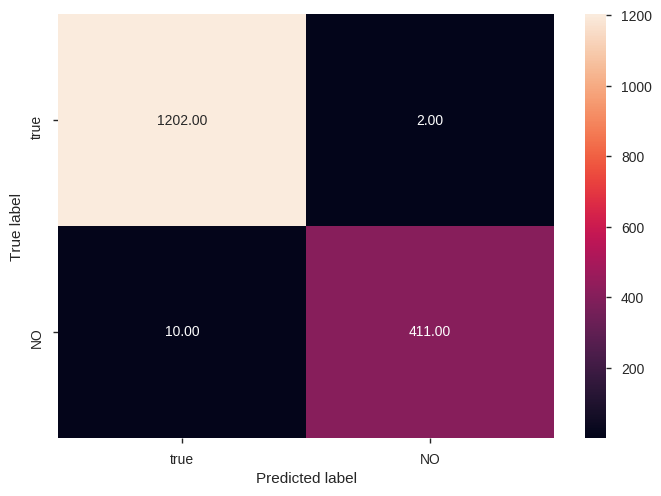

In [154]:
sns.heatmap(l_svm_cm, annot=True,  fmt='.2f', xticklabels = ["true", "NO"] , yticklabels = ["true", "NO"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [157]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred.round()))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1204
           1       1.00      0.98      0.99       421

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



In [159]:
precision_score(y_test, y_pred.round())

0.9951573849878934

In [160]:
recall_score(y_test, y_pred.round())

0.9762470308788599

In [162]:
f1_score(y_test,y_pred.round())

0.985611510791367

In [163]:
cohen_kappa_score(y_test, y_pred.round())

0.9806452381330496